In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import random 
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

5. (a) Plot $\alpha_m$ vs $\epsilon_m$ given that $0<\epsilon_m<1 $. Using $\alpha_m = ln\left(\frac{1-\epsilon_m}{\epsilon_m}\right)$

  AdaBoost trains a sequence of classifiers(weak learner) with re-weighted sample data, generating coefficients α for individual classifiers based on errors. This coefficient determines how much this weak classifier contributes to the final combined classifier. 

  α looks at the errors that classifier make. As we can see from the below graph, when error is high, α is smaller i.e., less importance of the classifier with errors in the voting. When error is low, α is large, which means higher importance in the voting.

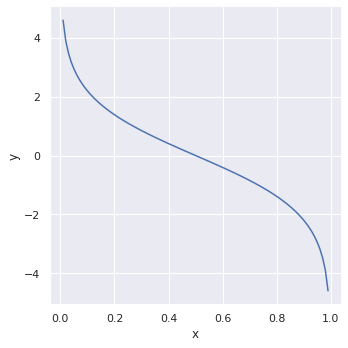

In [4]:
def adaboost_m1_alpha():
  x = np.arange(start=1e-2, stop=999e-3, step=1e-2)
  y = np.log((1-x)/x)
  df = pd.DataFrame(dict(x = x, y = y))
  g = sns.relplot(x="x", y="y", kind="line", data=df)

adaboost_m1_alpha()

(b). $w_{i,m+1} = g_m w_{i,m} $ for data point i at iteration m

  For data points misclassified by $\phi_m$, the weight updates for $i^{th}$ iteration can be written as $w_{i,m+1} = e^{\alpha_{m}} w_{i,m} $. So, $ g_m = e^{\alpha_{m}}$

  For data points correctly classified by $\phi_m$, the weight updates for $i^{th}$ iteration can be written as $w_{i,m+1} = e^{0} w_{i,m} $. So, $ g_m = e^{0} = 1$. If it is correctly classified, the indicator function will have value 0 so that the exponential term will be 1.  

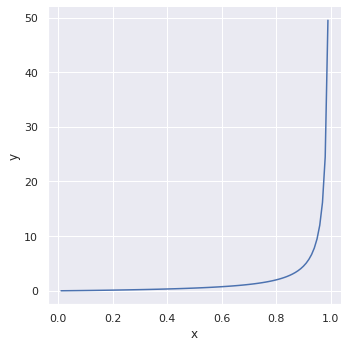

In [6]:
def adaboost_misclassification():
  x = np.arange(start=1e-2, stop=999e-3, step=1e-2)
  alpha = np.log((1-x)/x)
  y = 0.5 * np.exp(-alpha)
  df = pd.DataFrame(dict(x = x, y = y))
  sns.relplot(x="x", y="y", kind="line", data=df)

adaboost_misclassification()

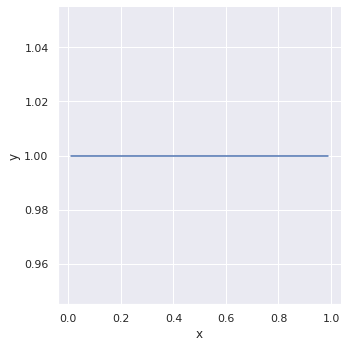

In [7]:
def adaboost_correct_classification():
  x = np.arange(start=1e-2, stop=999e-3, step=1e-2)
  alpha = np.log((1-x)/x)
  y = np.exp(0)
  df = pd.DataFrame(dict(x = x, y = y))
  g = sns.relplot(x="x", y="y", kind="line", data=df)

adaboost_correct_classification()

# 3. Random Forest for yeast data classification

This problem is intended to give some hands on experience using random forest. You are given a dataset adapted from the Yeast Data Set on UCI repository:
https://archive.ics.uci.edu/ml/datasets/Yeast containing 1484 data points and 8 features, and has been partitioned into a training set of 1000 data points, and a testing set of 484 data points. Be sure to use the datasets posted on the D2L website, as partitioned into training and testing datasets. The goal is to estimate the Protein Localization Site of each instance. The Protein Localization Site is a categorical label that takes 10 different values in form of strings. The provided .csv files are in the usual format for Python use.

### (a) Before setting up the random forest classifier, try a couple base (trivial) classifiers for comparison, as follows. Note that both classifiers output a label prediction without looking at the input feature values. 
  (i) A classifier that randomly picks an output label, with probability given by the label’s frequency of occurrence in the training data set. Run this classifier 10 times, with different seed each time, and give the resulting
mean percent classification error on the training set and separately on the test
set; also give the standard deviation of the percent classification error on the
training set and on the test set.

In [ ]:
# !unzip /content/drive/Data_files.zip

In [9]:
def load_datasets():
  X_train = pd.read_csv('x_train.csv') 
  y_train = pd.read_csv('y_train.csv', header=None).values.flatten()  
  X_test = pd.read_csv('x_test.csv')
  y_test = pd.read_csv('y_test.csv', header=None).values.flatten() 
  return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = load_datasets()

In [ ]:
def execute_strategy(strategy, ran):
  errors = {
      'train': [],
      'test': []
  }
  for i in range(0,ran):
    rand = random.randint(100,1000)
    clf = DummyClassifier(strategy=strategy, random_state=rand)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)

    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test)

    training_error = np.mean(y_pred_train != y_train)
    test_error = np.mean(y_pred != y_test)
    errors["train"].append(training_error)
    errors["test"].append(test_error)
    print(f'Seed: {rand} | Training Error: {training_error*100:.2f}% | Test Error: {test_error*100:.2f}%')

  print(f'Mean Training Error: {(np.mean(errors["train"])*100):.2f}% | Mean Test Error: {(np.mean(errors["test"])*100):.2f}%')
  print(f'Std Training Error : {(np.std(errors["train"])*100):.2f}%  | Std Test Error : {(np.std(errors["test"])*100):.2f}%')

In [ ]:
execute_strategy('uniform', 10)

Seed: 980 | Training Error: 90.30% | Test Error: 87.81%
Seed: 197 | Training Error: 91.60% | Test Error: 90.29%
Seed: 740 | Training Error: 90.70% | Test Error: 90.91%
Seed: 454 | Training Error: 88.80% | Test Error: 89.26%
Seed: 773 | Training Error: 89.40% | Test Error: 89.88%
Seed: 809 | Training Error: 90.40% | Test Error: 88.84%
Seed: 966 | Training Error: 91.50% | Test Error: 90.08%
Seed: 804 | Training Error: 91.50% | Test Error: 90.70%
Seed: 262 | Training Error: 90.10% | Test Error: 93.39%
Seed: 989 | Training Error: 89.80% | Test Error: 90.91%
Mean Training Error: 90.41% | Mean Test Error: 90.21%
Std Training Error : 0.89%  | Std Test Error : 1.41%


(ii) A classifier that always outputs the label of the most populated class (class with the largest as defined above). Give its percent classification error on the training set and separately on the test set.

In [ ]:
execute_strategy('most_frequent',3)

Seed: 278 | Training Error: 68.70% | Test Error: 69.01%
Seed: 548 | Training Error: 68.70% | Test Error: 69.01%
Seed: 520 | Training Error: 68.70% | Test Error: 69.01%
Mean Training Error: 68.70% | Mean Test Error: 69.01%
Std Training Error : 0.00%  | Std Test Error : 0.00%


In [13]:
import itertools
import statistics
from tqdm import trange, tqdm 
from statistics import stdev, mean
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [17]:
def random_forest_classifier(B, bag_size, max_features, max_depth):

  step_size=1
  mean_test_error = []
  mean_train_error=[]
  std_error=[]
  std_dev=[]
  std_dev_train=[]
  test_scores = [] 
  train_scores=[]

  x_train, x_test = X_train, X_test

  N = list(range(1, B+1, step_size))
  for i in tqdm(range(1, B+1), colour = 'blue', total = B, smoothing=0.5):
      test_scores = [] 
      train_scores=[]
      test_std=[]
      train_std=[]
      for l in range(1,11):
          x_train_bag,x_test_bag,y_train_bag,y_test_bag=train_test_split(x_train,y_train,train_size=bag_size,stratify=y_train)
          rf = RandomForestClassifier(n_estimators = i, max_features=max_features, max_depth = max_depth, bootstrap = True, criterion = 'entropy', n_jobs = -1)
          rf.fit(x_train_bag, y_train_bag)
          pred_train=rf.predict(x_train_bag)
          pred_test=rf.predict(x_test)
        
          test_acc=accuracy_score(pred_test,y_test)
          train_acc=accuracy_score(pred_train,y_train_bag)
          
          test_std.append(1-test_acc)
          train_std.append(1-train_acc)
          
          test_scores.append(accuracy_score(pred_test, y_test))
          train_scores.append(accuracy_score(pred_train, y_train_bag))

      std_dev.append(stdev(test_std))
      std_dev_train.append(stdev(train_std))
      test_error= [1 - score for score in test_scores]
      mean_test_error.append(mean(test_error))
      train_error= [1 - score for score in train_scores]
      mean_train_error.append(mean(train_error)) 
      std_error=statistics.stdev(test_std)

  if max_depth == None: max_depth = 0.00
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
  textstr = '\n'.join((
    r'$B            =%.2f$' % (B, ),
    r'$Bag Size     =%.2f$' % (bag_size, ),
    r'$Max Depth    =%.2f$' % (max_depth, ),
    r'$Max Features =%.2f$' % (max_features, )))
  
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
  ax1.text(0.3, 0.95, textstr, transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
  
  ax1.plot(N, std_dev_train, label='Train Error Std')
  ax1.plot(N, std_dev, label='Test Error Std')
  ax1.legend(loc="upper right")
  ax1.set_xlabel('Number of trees')
  ax1.set_ylabel( 'Error rate std')

  ax2.plot(N, mean_train_error, label='Train Error Mean')
  ax2.plot(N, mean_test_error, label='Test Error Mean')
  ax2.legend(loc='best')
  ax2.set_xlabel('Number of trees')
  ax2.set_ylabel('Mean error rate')
  plt.show()

  a = np.array(mean_test_error) 
  b = np.array(std_dev)
  best_err_indx = np.where(a == a.min())
  print(f'Best Testing error rate at x[{best_err_indx}] = {a[best_err_indx]} \
  and std at y[{best_err_indx}] = {b[best_err_indx]}')

100%|██████████| 30/30 [01:34<00:00,  3.15s/it]


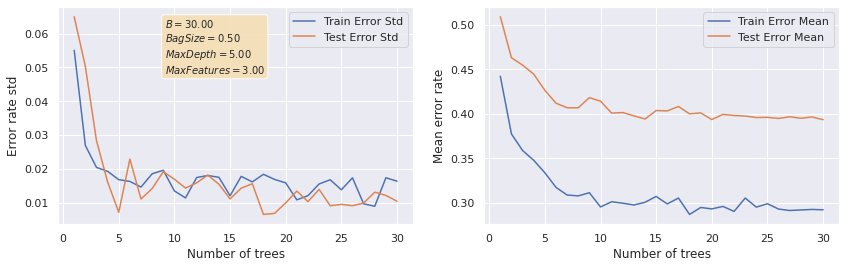

Best Testing error rate at x[(array([29]),)] = [0.39338843]   and std at y[(array([29]),)] = [0.01036267]


In [18]:
random_forest_classifier(30, 1/2, 3, 5)

100%|██████████| 100/100 [06:28<00:00,  3.89s/it]


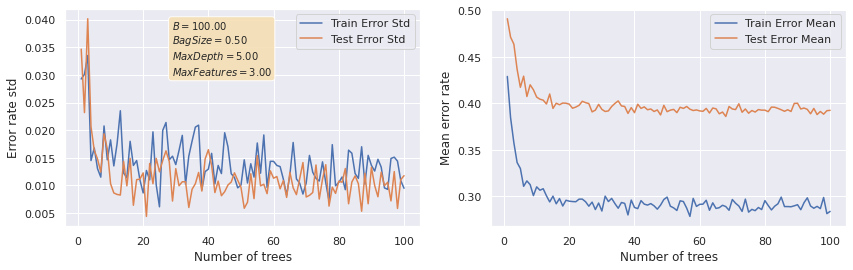

In [ ]:
random_forest_classifier(100, 1/2, 3, 5)

(b)(i). Does the
curve show convergence? It is not a proper convergence as expected. However, there is not much difference compared to error rates with 30 bags, but the variance of std is high. It is certainly true that increasing number of trees does not cause the random forest sequence to overfit. However, this limit can overfit the data; the average of fully grown trees can result in too rich a model, and incur unnecessary variance.

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


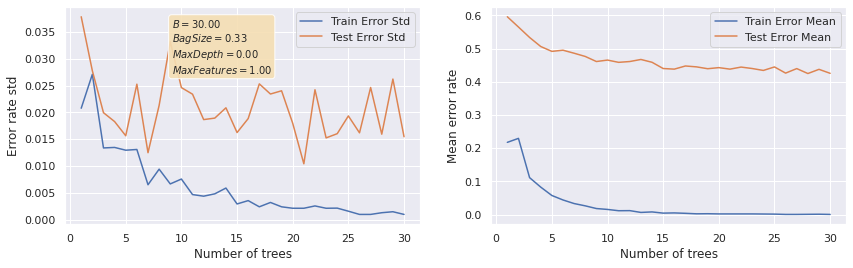

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


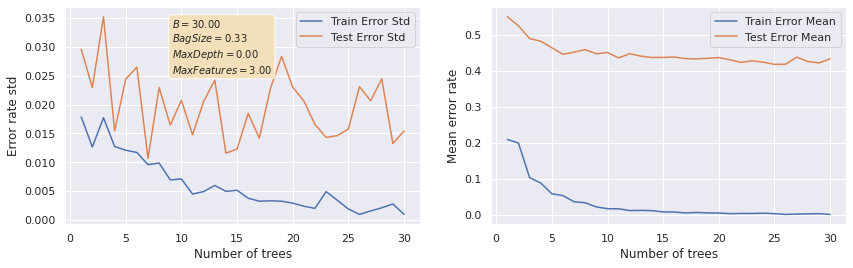

100%|██████████| 30/30 [01:34<00:00,  3.14s/it]


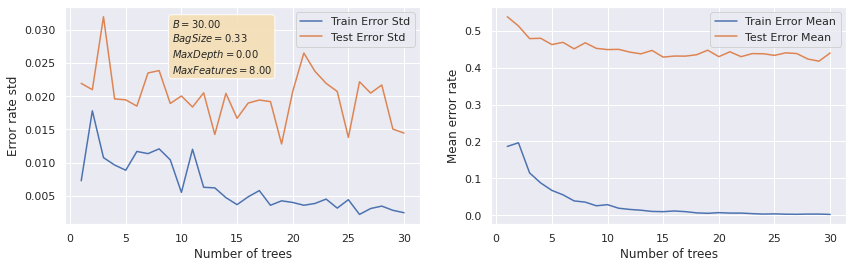

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


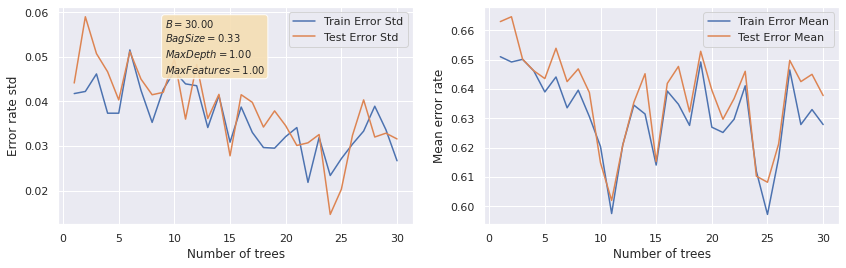

100%|██████████| 30/30 [01:34<00:00,  3.13s/it]


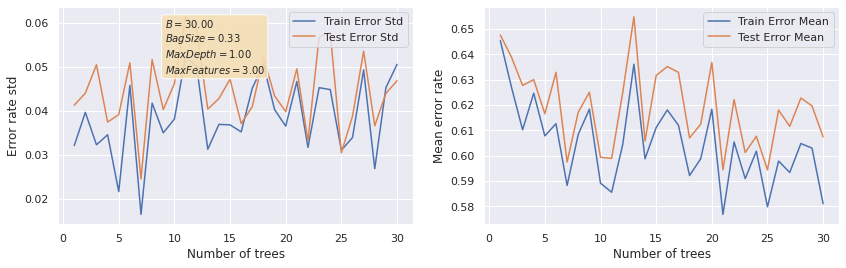

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


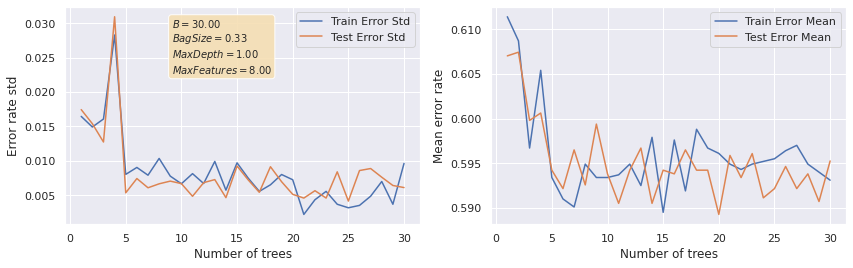

100%|██████████| 30/30 [01:34<00:00,  3.13s/it]


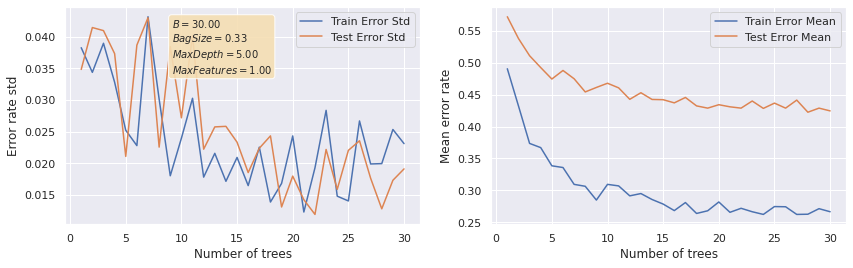

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


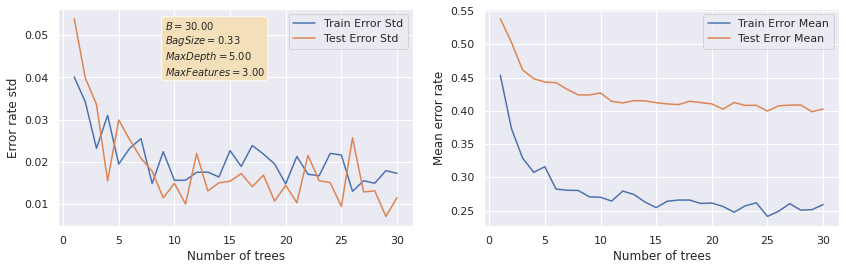

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


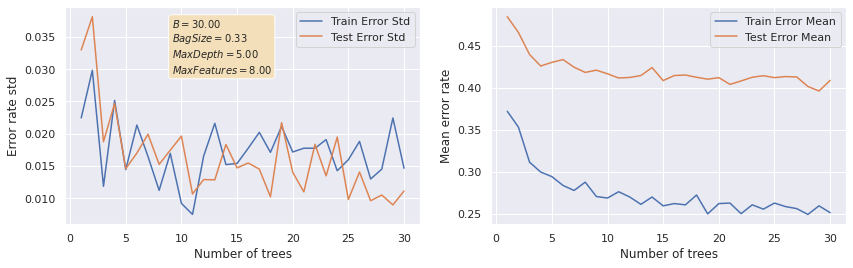

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


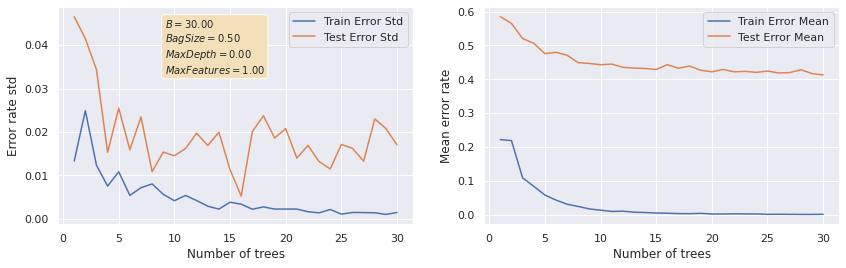

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


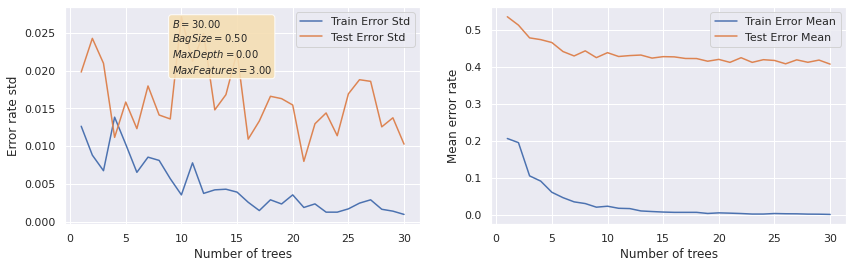

100%|██████████| 30/30 [01:35<00:00,  3.17s/it]


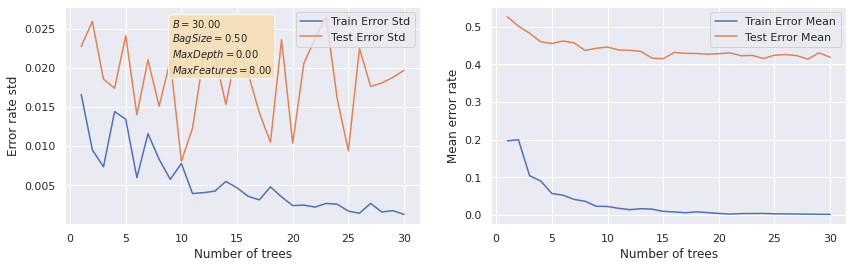

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


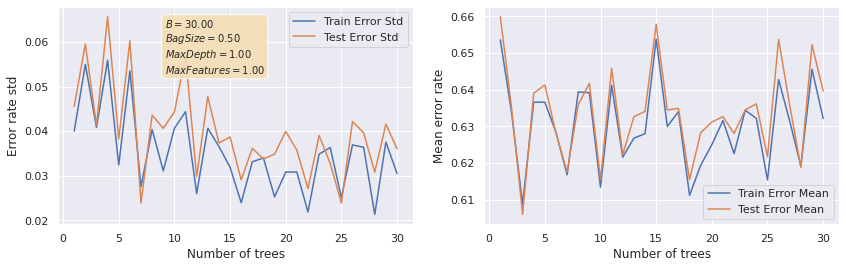

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


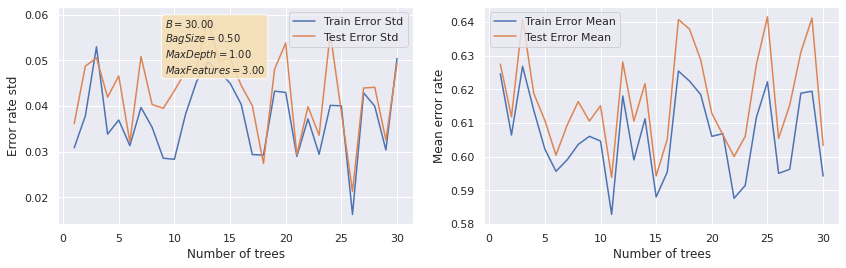

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


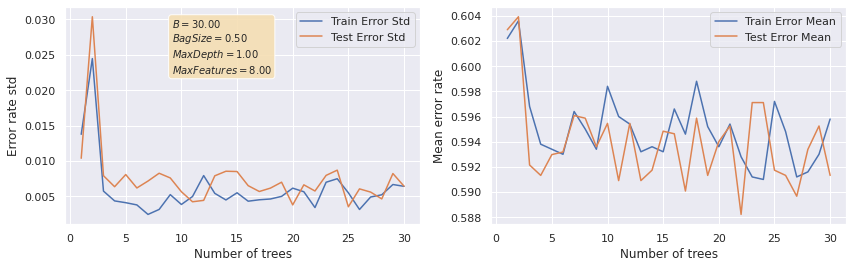

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


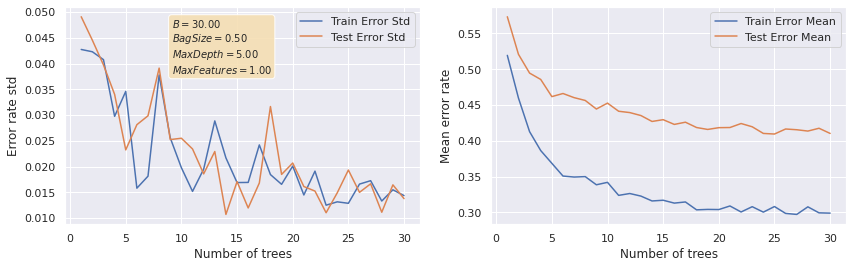

100%|██████████| 30/30 [01:34<00:00,  3.14s/it]


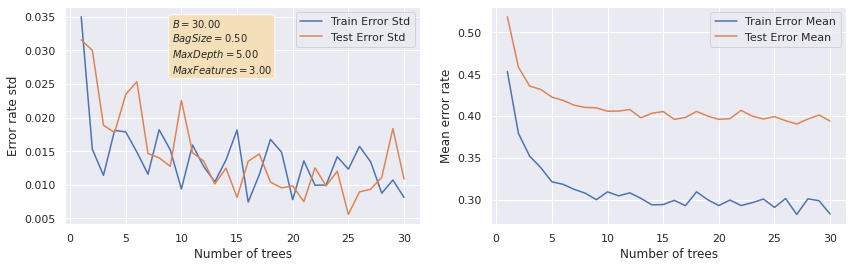

100%|██████████| 30/30 [01:34<00:00,  3.14s/it]


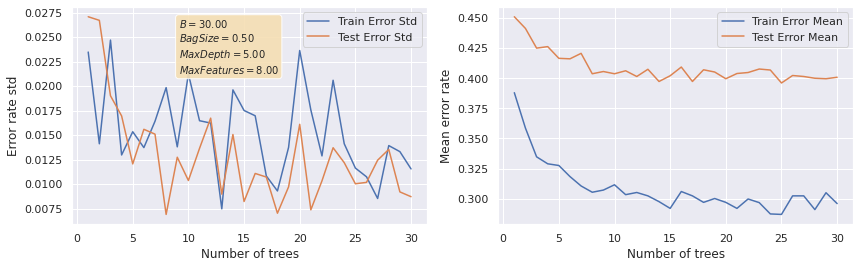

100%|██████████| 30/30 [01:34<00:00,  3.14s/it]


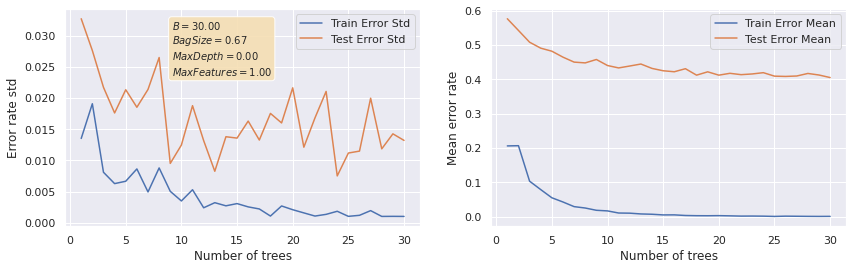

100%|██████████| 30/30 [01:34<00:00,  3.15s/it]


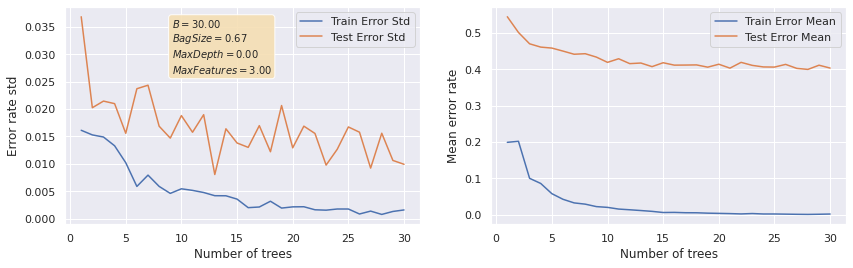

100%|██████████| 30/30 [01:39<00:00,  3.32s/it]


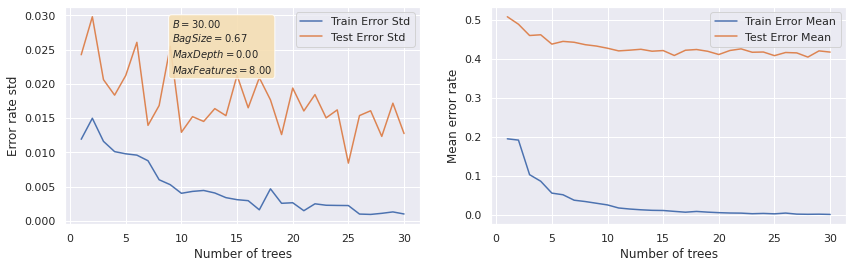

100%|██████████| 30/30 [01:34<00:00,  3.14s/it]


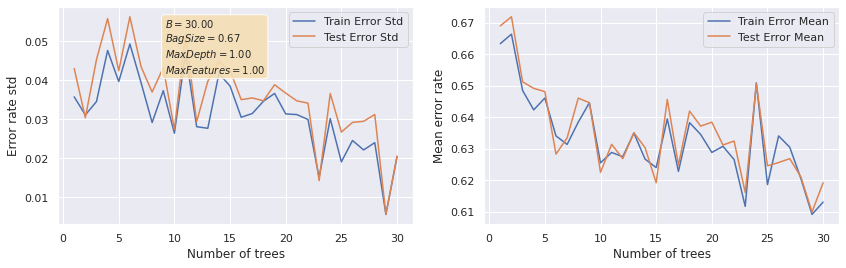

100%|██████████| 30/30 [01:34<00:00,  3.14s/it]


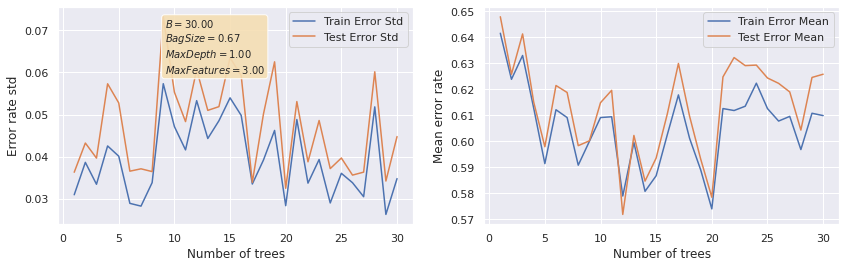

100%|██████████| 30/30 [01:34<00:00,  3.15s/it]


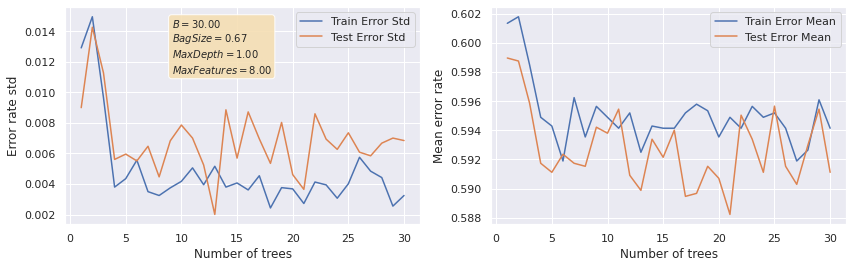

100%|██████████| 30/30 [01:34<00:00,  3.15s/it]


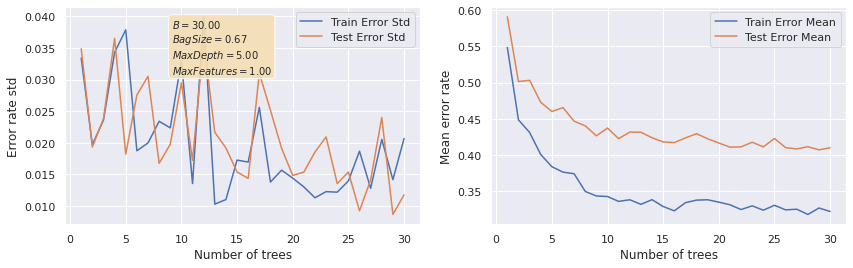

100%|██████████| 30/30 [01:34<00:00,  3.14s/it]


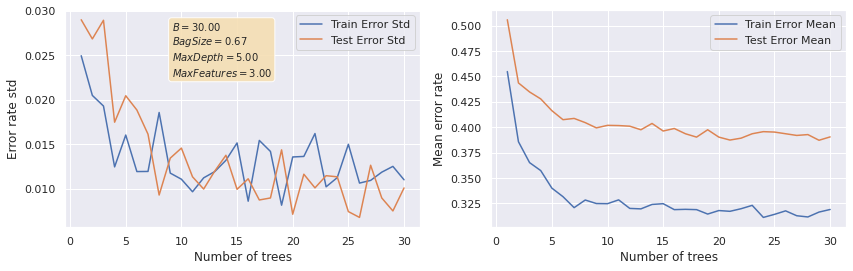

100%|██████████| 30/30 [01:34<00:00,  3.14s/it]


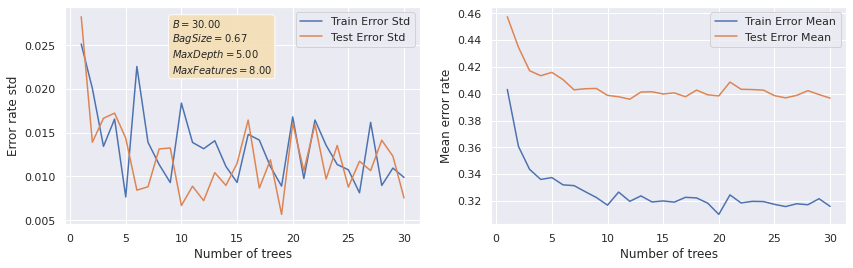

In [ ]:
def execute_grid():
  B = 30
  bag_size = [1/3, 1/2, 2/3]
  max_depth = [None, 1, 5]
  max_features= [1, 3, 8]
  for (bag, depth, feature) in itertools.product(bag_size, max_depth, max_features):
    random_forest_classifier(B, bag, feature, depth)
execute_grid()


### how does the performance change as you adjust those parameters?

#### 1. Tuning max_depth: 
A deeper tree can fit more complicated functions. Therefore, increasing tree depth should increase performance on the training set. But, increased flexibility also gives greater ability to overfit the data, and generalization performance may suffer if depth is increased too far (i.e. test set performance may decrease). In this case, max_depth = 5 looks ideal.

#### 2. Tuning max_features: 

We can see optimal features to set here is 3. The error rate and std values are stable and not incresing when set to 3. For combinations with 8 features, we can see from the loss curves, the model overfits.

#### 2. Tuning bag_size: 

We can see that increasing the bag size accordingly reduces the error rate and the test and train std is also reduced. It brings more stability to the model.

(iv) Based on your results in (i) and (iii), choose a best setting. Compare it with the two trivial classifiers of part (a): has it learned from the data? 
- Yes. We can see the error rates of dummy classifiers have high error rates and consistent. This significance of constant loss values implies no learning whereas, the loss curves in this classifier show convergence or lowering of loss values as you train the model. 

100%|██████████| 30/30 [01:34<00:00,  3.15s/it]


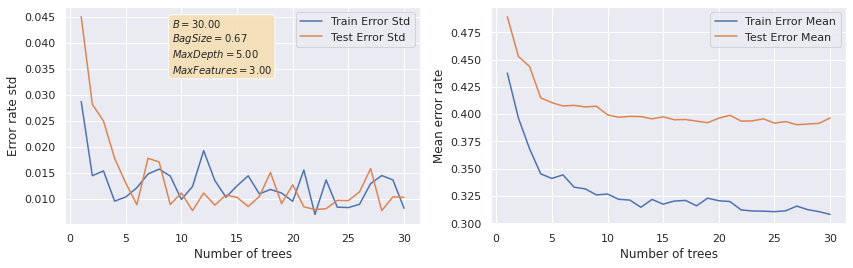

In [15]:
# Best Setting
random_forest_classifier(30, 0.67, 3, 5)